### Importing relevant packages

In [1]:
import numpy as np
import pomegranate
from pomegranate import *
import matplotlib.pyplot as plt
# from pomegranate import BayesianNetwork, DiscreteDistribution, ConditionalProbabilityTable, Node
from pomegranate.utils import plot_networkx

### Problem Statement

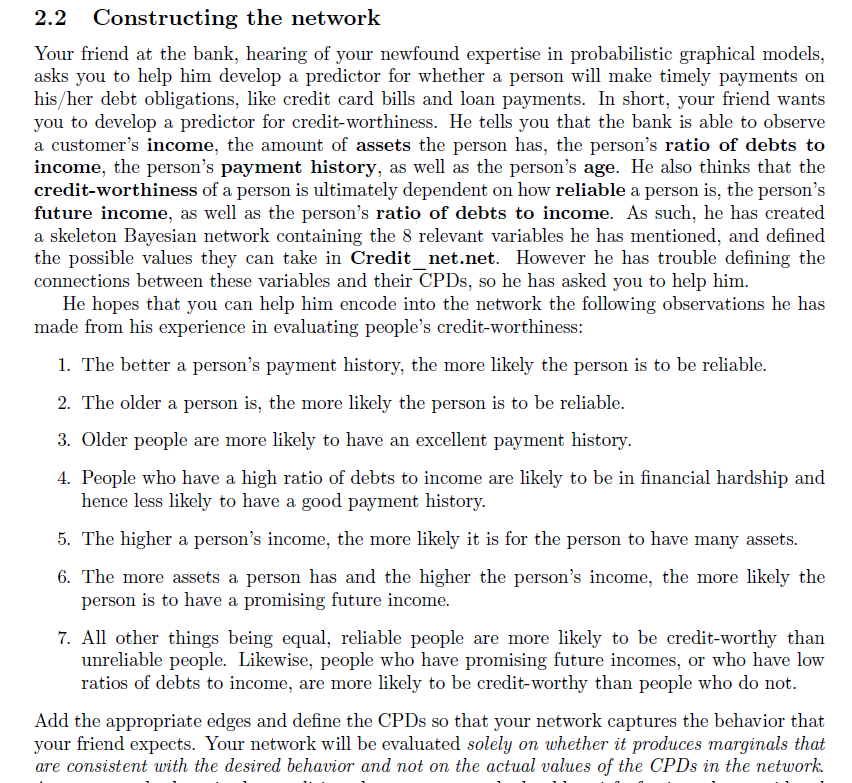

In [2]:
from IPython import display
display.Image("Capture.PNG")

### Setting nodes and corresponding cpds

In [3]:
age = DiscreteDistribution({'young': 0.7, 'old': 0.3})

income = DiscreteDistribution({'high': 0.55, 'low': 0.45})

ratio = DiscreteDistribution({'high': 0.4, 'low': 0.6})






payment_history= ConditionalProbabilityTable([
    
    
  ['young','high', 'good', 0.1],
  ['young','high', 'bad', 0.9],
  ['old','high', 'good', 0.7],
  ['old','high', 'bad', 0.3],  
  ['young','low', 'good', 0.25],
  ['young','low', 'bad', 0.75],
  ['old','low', 'good', 0.9],
  ['old','low', 'bad', 0.1]], 
[age, ratio]

) 


reliability = ConditionalProbabilityTable([
    
    
  ['young','good', 'high', 0.7],
  ['young','good', 'low', 0.3],
  ['old','good', 'high', 0.85],
  ['old','good', 'low', 0.15],  
  ['young','bad', 'high',0.4 ],
  ['young','bad', 'low', 0.6],
  ['old','bad', 'high', 0.45],
  ['old','bad', 'low', 0.55]],
 [age, payment_history]

) 



assets = ConditionalProbabilityTable([
    
    
  ['high','many', 0.8],
  ['high','few', 0.2],
  ['low','many', 0.1],
  ['low','few', 0.9]],  
  [income]

) 




future_income = ConditionalProbabilityTable([
    
    
  ['many','high', 'high', 0.9],
  ['many','high', 'low', 0.1],
  ['few','high', 'high', 0.3],
  ['few','high', 'low', 0.7],  
  ['many','low', 'high',0.8 ],
  ['many','low', 'low', 0.2],
  ['few','low', 'high', 0.15],
  ['few','low', 'low', 0.85]],
 [assets, income]) 





credit_worthy = ConditionalProbabilityTable([
    
    
  ['high','high','high', 'yes', 0.8],
  ['high','high','high', 'no', 0.2],
  ['high','high','low', 'yes', 0.99],
  ['high','high','low','no', 0.01],  
  ['high','low','high', 'yes',0.3 ],
  ['high','low','high' ,'no', 0.7],
  ['high','low','low', 'yes', 0.6],
  ['high','low','low' ,'no', 0.4],
  ['low','high', 'high','yes', 0.15],
  ['low','high', 'high','no', 0.85],
  ['low','high', 'low','yes', 0.2],
  ['low','high', 'low','no', 0.8],  
  ['low','low', 'high','yes',0.1 ],
  ['low','low', 'high','no', 0.9],
  ['low','low', 'low','yes', 0.15],
  ['low','low', 'low','no', 0.85]],
    
    
 [future_income, reliability,ratio]

) 







s1 = Node(age, name="age")
s2 = Node(income, name="income")
s3 = Node(ratio, name="ratio")
s4 = Node(payment_history, name="payment_history")
s5 = Node(reliability, name="reliability")
s6 = Node(assets, name="assets")
s7 = Node(future_income, name="future_income")
s8 = Node(credit_worthy, name="credit_worthy")



### Constructing connections

In [4]:
model = BayesianNetwork("Credit Worthiness")

model.add_nodes(s1, s2, s3, s4, s5, s6, s7, s8)



model.add_edge(s1, s4)
model.add_edge(s1, s5)
model.add_edge(s3, s4)
model.add_edge(s3, s8)
model.add_edge(s4, s5)
model.add_edge(s5, s8)
model.add_edge(s2, s6)
model.add_edge(s2, s7)
model.add_edge(s6, s7)
model.add_edge(s7, s8)




model.bake()

### Maximum liklihood Estimation 

In [5]:
### This function gives for instance 1 if p(x=1)>0.5 else it gives 0
model.predict([{}])

[array(['young', 'high', 'low', 'bad', 'high', 'few', 'high', 'no'],
       dtype=object)]

In [6]:
model.predict([{'income':'high','assets':'many','future_income':'high'}])

[array(['young', 'high', 'low', 'bad', 'high', 'many', 'high', 'yes'],
       dtype=object)]

In [7]:
model.predict([[None,'high',None,None,None,'many','high',None]])

[array(['young', 'high', 'low', 'bad', 'high', 'many', 'high', 'yes'],
       dtype=object)]

### Predicting joint probability 

In [8]:
model.probability([['young',None,None,None,None,None,None,None]])

0.7

In [9]:
model.probability([[None,'high',None,None,None,'many','high',None]])

0.396

In [10]:
model.probability([['young','high','high','good','high',None,None,None]])

0.010780000000000003

In [11]:
model.probability([[None,'low',None,None,None,'many',None,None]])

0.045000000000000005

### Let's make some inference

In [5]:
age = int(input("enter your age: young:0 old:1 None:2 >>> "))
income = int(input("enter your income: low:0 high:1 None:2 >>>"))
ratio = int(input("enter your debt to income ratio:>>> low:0 high:1 None:2 >>>"))
payment_history = int(input("enter your payment_history: bad:0 good:1 None:2 >>>"))
reliability = int(input("enter your reliability: low:0 high:1 None:2 >>>"))
assets = int(input("enter your assets: few:0 many:1 None:2 >>>"))
future_income = int(input("enter your future_income: low:0 high:1 None:2 >>>"))
credit_worthy = int(input("enter your credit_worthy: no:0 yes:1 None:2 >>>"))


age= 'young' if age==0 else 'old' if age==1 else None
income= 'low' if income==0 else 'high' if income==1 else None
ratio= 'low' if ratio==0 else 'high' if ratio==1 else None
payment_history= 'bad' if payment_history==0 else 'good' if payment_history==1 else None
reliability= 'low' if reliability==0 else 'high' if reliability==1 else None
assets= 'few' if assets==0 else 'many' if assets==1 else None
future_income= 'low' if future_income==0 else 'high' if future_income==1 else None
credit_worthy= 'no' if credit_worthy==0 else 'yes' if credit_worthy==1 else None


random_variables= [age,income,ratio,payment_history,reliability,assets,future_income,credit_worthy]
print('\n\n\nYour joint probability equals: ',model.probability([random_variables]))



enter your age: young:0 old:1 None:2 >>> 1
enter your income: low:0 high:1 None:2 >>>1
enter your debt to income ratio:>>> low:0 high:1 None:2 >>>1
enter your payment_history: bad:0 good:1 None:2 >>>1
enter your reliability: low:0 high:1 None:2 >>>1
enter your assets: few:0 many:1 None:2 >>>1
enter your future_income: low:0 high:1 None:2 >>>1
enter your credit_worthy: no:0 yes:1 None:2 >>>1



Your joint probability equals:  0.022619519999999994


### Predicting conditional probability

In [92]:
### The code below returns the conditional probability for each random variable given that future_income is high
model.predict_proba([[None,'high',None,None,None,None,None,None]])

[array([{
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "young" : 0.6999999999999997,
                    "old" : 0.3000000000000001
                }
            ],
            "frozen" : false
        }                                        , 'high',
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "high" : 0.4000000000000001,
                    "low" : 0.6
                }
            ],
            "frozen" : false
        }                                       ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "good" : 0.37900000000000017,
                    "bad" : 0.62

In [93]:
### In order to get a much prettier printing style we just extract the relevant random variable we wanna reason about
model.predict_proba([[None,'high',None,None,None,None,None,None]])[0][7].to_dict()['parameters']

[{'no': 0.4082347336, 'yes': 0.5917652663999998}]

In [17]:
### predictiong the marginal probability
model.predict_proba([{}])[0][6].to_dict()['parameters']

[{'high': 0.5344125000000002, 'low': 0.4655875}]

In [95]:
### we can also pass the input as a dictionary with key[variable] and its ocrresponding value[parameter]
model.predict_proba([{'future_income':'low','reliability':'low','ratio':'low'}])[0][7].to_dict()['parameters']

[{'no': 0.8499999999999998, 'yes': 0.1500000000000001}]

In [8]:
model.predict_proba([{'reliability':'low','credit_worthy':'yes','ratio':'high'}])[0][2].to_dict()['parameters']

[{'high': 0.2814595320010169, 'low': 0.7185404679989831}]

In [26]:
model.predict_proba([{'credit_worthy':'yes','future_income':'high'}])[0][2].to_dict()['parameters']

[{'high': 0.3127481649303982, 'low': 0.6872518350696019}]

In [25]:
model.predict_proba([{'credit_worthy':'yes','future_income':'low'}])[0][2].to_dict()['parameters']

[{'high': 0.319924051305695, 'low': 0.680075948694305}]

### Let's make some inference

In [33]:
w = int(input("Which variable you would like to reason about:\n\
age:0\nincome:1\nratio:2\npayment_history:3\nreliability:4\nassets:5\nfuture_income:6\ncredit_worthy:7\n"))




age = int(input("enter your age: young:0 old:1 None:2 >>> "))
income = int(input("enter your income: low:0 high:1 None:2 >>>"))
ratio = int(input("enter your debt to income ratio:>>> low:0 high:1 None:2 >>>"))
payment_history = int(input("enter your payment_history: bad:0 good:1 None:2 >>>"))
reliability = int(input("enter your reliability: low:0 high:1 None:2 >>>"))
assets = int(input("enter your assets: few:0 many:1 None:2 >>>"))
future_income = int(input("enter your future_income: low:0 high:1 None:2 >>>"))
credit_worthy = int(input("enter your credit_worthy: no:0 yes:1 None:2 >>>"))


age= 'young' if age==0 else 'old' if age==1 else None
income= 'low' if income==0 else 'high' if income==1 else None
ratio= 'low' if ratio==0 else 'high' if ratio==1 else None
payment_history= 'bad' if payment_history==0 else 'good' if payment_history==1 else None
reliability= 'low' if reliability==0 else 'high' if reliability==1 else None
assets= 'few' if assets==0 else 'many' if assets==1 else None
future_income= 'low' if future_income==0 else 'high' if future_income==1 else None
credit_worthy= 'no' if credit_worthy==0 else 'yes' if credit_worthy==1 else None



keys= ['age','income','ratio','payment_history','reliability','assets','future_income','credit_worthy']

values= [age,income,ratio,payment_history,reliability,assets,future_income,credit_worthy]


mapping_dict= dict(zip(keys,values))

mapping_dict_filtered = {k: v for k, v in mapping_dict.items() if v is not None}



print(f'\n\n\nProbability of {keys[w]} given {mapping_dict_filtered} equals: ',model.predict_proba([mapping_dict_filtered])[0][w].to_dict()['parameters'])



Which variable you would like to reason about:
age:0
income:1
ratio:2
payment_history:3
reliability:4
assets:5
future_income:6
credit_worthy:7
7
enter your age: young:0 old:1 None:2 >>> 0
enter your income: low:0 high:1 None:2 >>>0
enter your debt to income ratio:>>> low:0 high:1 None:2 >>>0
enter your payment_history: bad:0 good:1 None:2 >>>1
enter your reliability: low:0 high:1 None:2 >>>1
enter your assets: few:0 many:1 None:2 >>>0
enter your future_income: low:0 high:1 None:2 >>>0
enter your credit_worthy: no:0 yes:1 None:2 >>>2



Probability of credit_worthy given {'age': 'young', 'income': 'low', 'ratio': 'low', 'payment_history': 'good', 'reliability': 'high', 'assets': 'few', 'future_income': 'low'} equals:  [{'yes': 0.20000000000000012, 'no': 0.7999999999999999}]


### Visualization of the graph

In [12]:
import networkx as nx

In [13]:
G = nx.DiGraph()

In [14]:
A= {
    'age':['payment_history','reliability'],
    'income':['assets','future_income'],
    'ratio':['payment_history','credit_worthy'],
    'payment_history':['reliability'],
    'reliability':['credit_worthy'],
    'future_income':['credit_worthy'],
    'assets':['future_income'],

    
}


In [15]:
G=nx.DiGraph(A)

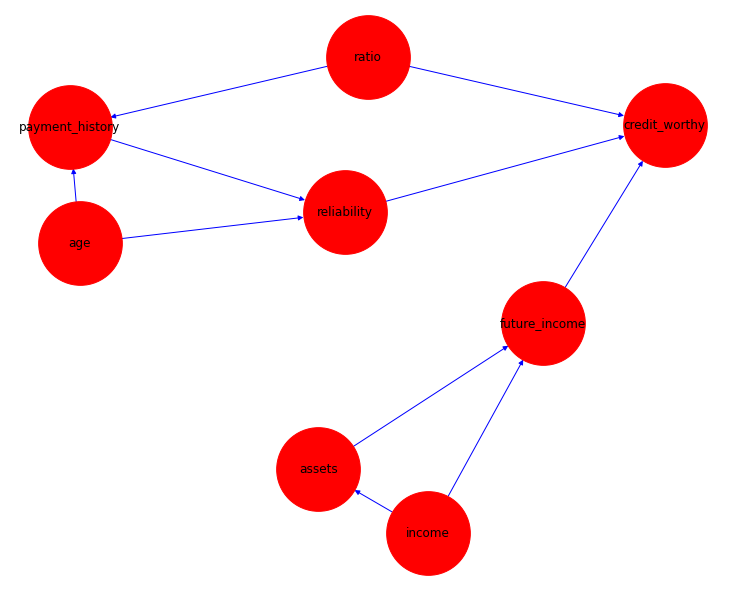

In [21]:
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G)
nx.draw(G,node_size=7000,node_color='r',pos=pos,with_labels=True,edge_color='b')